In [2]:
from math import sin,cos,log,ceil
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['font.size']=16

In [1]:
g=9.8
v_t=4.9
C_D=.2
C_L=1
v0=v_t

x0=0
y0=5

In [3]:
def f(u):
    v=u[0]
    theta=u[1]
    x=u[2]
    y=u[3]
    return numpy.array([-g*sin(theta)-C_D/C_L*g/v_t**2*v**2,-g*cos(theta)/v+g/v_t**2*v,v*cos(theta),v*sin(theta)])

In [4]:
def euler_step(u,f,dt):
    return u+dt*f(u)

In [5]:
T=30
dt=0.001
N=int(T/dt)+1
t=numpy.linspace(0,T,N)
u=numpy.empty((N,4))

In [6]:
x_max=0
theta_max=0
ground=0
for theta0 in range (0,90,):
    theta0=theta0/180*numpy.pi
    u[0]=numpy.array([v0,theta0,x0,y0])
    for n in range(N-1):
        u[n+1]=euler_step(u[n],f,dt)
    x=u[:,2]
    y=u[:,3]
    y_ground=numpy.where(y<0)[0]
    if len(y_ground)==0:
        print('Not reaching ground!')
    else:
        ground=y_ground[0]
    if x[ground]>x_max:
        x_max=x[ground]
        theta_max=theta0
        print(x_max,theta_max/numpy.pi*180)
    else:
        break

25.4927245991 0.0
25.506372892 1.0
25.5144077992 2.0
25.526293835 3.0
25.5278332051 4.0
25.5332187614 5.0


In [ ]:
u[0]=numpy.array([v0,theta0,x0,y0])
for n in range(N-1):
    u[n+1]=euler_step(u[n],f,dt)

In [ ]:
theta0_values=numpy.array([0,numpy.pi*.25,numpy.pi*.5,numpy.pi*0.75])
u_values=numpy.empty_like(theta0_values,dtype=numpy.ndarray)
for j,theta0 in enumerate(theta0_values):
    u=numpy.empty((N,4))
    u[0]=numpy.array([v0,theta0,x0,y0])
    u_values[j]=euler(u,dt,theta0_values[j])

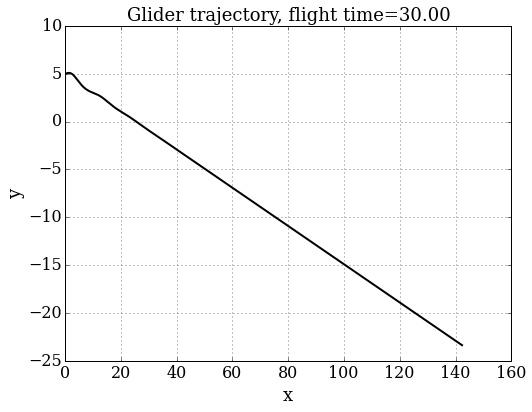

In [7]:
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x',fontsize=18)
pyplot.ylabel(r'y',fontsize=18)
pyplot.title('Glider trajectory, flight time=%.2f'%T,fontsize=18)
pyplot.plot(x,y,'k-',lw=2);

In [8]:
dt_values=numpy.array([0.1,0.05,0.01,0.005,0.0001])
u_values=numpy.empty_like(dt_values,dtype=numpy.ndarray)
for i,dt in enumerate(dt_values):
    N=int(T/dt)+1
    t=numpy.linspace(0.0,T,N)
    u=numpy.empty((N,4))
    u[0]=numpy.array([v0,theta0,x0,y0])
    for n in range(N-1):
        u[n+1]=euler_step(u[n],f,dt)
    u_values[i]=u

In [9]:
def get_diffgrid(u_current,u_fine,dt):
    N_current=len(u_current[:,0])
    N_fine=len(u_fine[:,0])
    grid_size_ratio=ceil(N_fine/N_current)
    diffgrid=dt*numpy.sum(numpy.abs(u_current[:,2]-u_fine[::grid_size_ratio,2]))
    return diffgrid

In [10]:
diffgrid=numpy.empty_like(dt_values)
for i,dt in enumerate(dt_values):
    print('dt = {}'.format(dt))
    diffgrid[i]=get_diffgrid(u_values[i],u_values[-1],dt)

dt = 0.1
dt = 0.05
dt = 0.01
dt = 0.005
dt = 0.0001


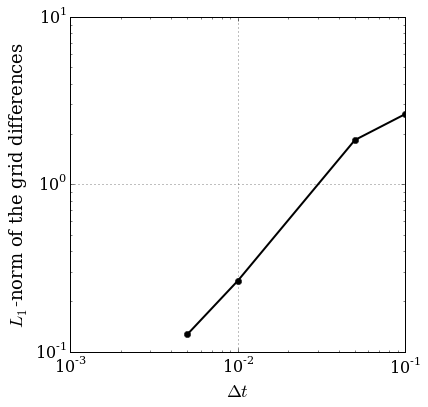

In [11]:
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel('$\Delta t$',fontsize=18)
pyplot.ylabel('$L_1$-norm of the grid differences',fontsize=18)
pyplot.axis('equal')
pyplot.loglog(dt_values[:-1],diffgrid[:-1],color='k',ls='-',lw=2,marker='o');